In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import keras
keras.__version__

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.5'

In [3]:
from keras.datasets import mnist

In [4]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

3

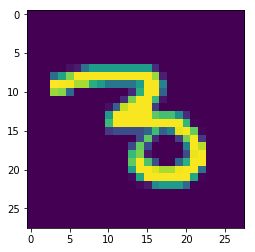

In [6]:
plt.imshow(train_images[30])
train_labels[30]

In [7]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [8]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [10]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 10s 170us/step - loss: 0.2552 - acc: 0.9255
Epoch 2/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.1027 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.0688 - acc: 0.9799
Epoch 4/5
60000/60000 [==============================] - 10s 163us/step - loss: 0.0494 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 15s 245us/step - loss: 0.0371 - acc: 0.9885


In [12]:
network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 114us/step


[0.06390553581148851, 0.9798]

In [13]:
train_images_mean = train_images.mean(axis=0)

In [14]:
train_images_mean.shape

(784,)

In [15]:
train_images_mean = train_images_mean.reshape((1, 28 * 28))

In [16]:
network.predict_proba(train_images_mean)

array([[0.07289906, 0.00561956, 0.09500153, 0.21491577, 0.00408854,
        0.02918722, 0.02244855, 0.00992696, 0.47015828, 0.07575452]],
      dtype=float32)

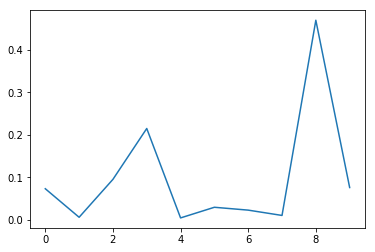

In [17]:
plt.plot(network.predict_proba(train_images_mean)[0])

In [18]:
import numpy as np
X = np.random.rand(10000,28*28)

prob = network.predict_proba(X)
prob.shape

(10000, 10)

In [19]:
prob_mean = prob.mean(axis=0)
prob_mean.shape

(10,)

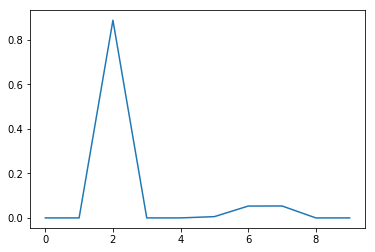

In [20]:
plt.plot(prob_mean)

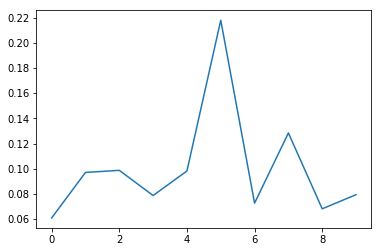

In [21]:
X_zero = np.dot(X,prob_mean[0])
plt.plot(network.predict_proba(X_zero)[0])